## NLP Class Final Project Read Data

In [26]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
import string
from nltk import download
import multiprocessing
import warnings
warnings.filterwarnings("ignore")
from pandarallel import pandarallel
import pickle
from gensim.models import LdaMulticore
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import nltk
from nltk.tokenize import word_tokenize
from multiprocessing import Pool
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from textblob.sentiments import NaiveBayesAnalyzer
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
download('stopwords')
download('wordnet')
nltk.download('punkt')


stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
pyLDAvis.enable_notebook()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyusungchokyusungcho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyusungchokyusungcho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kyusungchokyusungcho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [3]:
!pip install vaderSentiment

In [4]:
news_df = pd.read_parquet('news_df_sample.parquet', engine='pyarrow')
news_df

/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py:706: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022,AI Technology and Innovation
193040,https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured,2022-06-17,en,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreak,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign PolicyHealthHealthP...,mit engineer develop artificial intelligence chip that can stacked reconfigured newsbreaksign arttv seriesbooks dancebehind viral videosperforming artstv musichip healthhealth servicesmental healthdiseases healthcancerfood sportspremier drinkspetsbeauty safetypublic safetyaccidentslaw enforcementtraffic advicefamily rentlabor issuestrouble scienceearth scienceeducationhigh nationsmiddle location channel ic people inin this article mit engineer spherical robot light emitting diode backlit key...,"[mit, engineer, develop, artificial, intelligence, chip, that, can, stacked, reconfigured, newsbreaksign, arttv, seriesbooks, dancebehind, viral, videosperforming, artstv, musichip, healthhealth, servicesmental, healthdiseases, healthcancerfood, sportspremier, drinkspetsbeauty, safetypublic, safetyaccidentslaw, enforcementtraffic, advicefamily, rentlabor, issuestroub

In [5]:
news_df

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022,AI Technology and Innovation
193040,https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured,2022-06-17,en,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreak,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign PolicyHealthHealthP...,mit engineer develop artificial intelligence chip that can stacked reconfigured newsbreaksign arttv seriesbooks dancebehind viral videosperforming artstv musichip healthhealth servicesmental healthdiseases healthcancerfood sportspremier drinkspetsbeauty safetypublic safetyaccidentslaw enforcementtraffic advicefamily rentlabor issuestrouble scienceearth scienceeducationhigh nationsmiddle location channel ic people inin this article mit engineer spherical robot light emitting diode backlit key...,"[mit, engineer, develop, artificial, intelligence, chip, that, can, stacked, reconfigured, newsbreaksign, arttv, seriesbooks, dancebehind, viral, videosperforming, artstv, musichip, healthhealth, servicesmental, healthdiseases, healthcancerfood, sportspremier, drinkspetsbeauty, safetypublic, safetyaccidentslaw, enforcementtraffic, advicefamily, rentlabor, issuestroub

In [6]:
news_df.head()

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022,AI Technology and Innovation
193040,https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured,2022-06-17,en,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreak,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign PolicyHealthHealthP...,mit engineer develop artificial intelligence chip that can stacked reconfigured newsbreaksign arttv seriesbooks dancebehind viral videosperforming artstv musichip healthhealth servicesmental healthdiseases healthcancerfood sportspremier drinkspetsbeauty safetypublic safetyaccidentslaw enforcementtraffic advicefamily rentlabor issuestrouble scienceearth scienceeducationhigh nationsmiddle location channel ic people inin this article mit engineer spherical robot light emitting diode backlit key...,"[mit, engineer, develop, artificial, intelligence, chip, that, can, stacked, reconfigured, newsbreaksign, arttv, seriesbooks, dancebehind, viral, videosperforming, artstv, musichip, healthhealth, servicesmental, healthdiseases, healthcancerfood, sportspremier, drinkspetsbeauty, safetypublic, safetyaccidentslaw, enforcementtraffic, advicefamily, rentlabor, issuestroub

In [7]:
print(news_df['text'].head())

17886     \n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n    \n      By\n      \nJames Vincent\n  May 24, 2022,  7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...
193040    MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign Pol

## Sentiment Analysis

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [9]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from joblib import Parallel, delayed

analyzer = SentimentIntensityAnalyzer()

def analyze_and_classify_sentiment(title, text):
    title_analyzed = analyzer.polarity_scores(title)
    text_analyzed = analyzer.polarity_scores(text)
    sentiment_score = (title_analyzed['compound'] + text_analyzed['compound']) / 2
    sentiment = 'neutral'
    if sentiment_score <= -0.5:
        sentiment = 'negative'
    elif sentiment_score >= 0.5:
        sentiment = 'positive'
    return sentiment_score, sentiment

results = Parallel(n_jobs=-1)(delayed(analyze_and_classify_sentiment)(row['title'], row['text']) for index, row in news_df.iterrows())

results_df = pd.DataFrame(results, columns=['sentiment_score', 'sentiment'])

news_df['sentiment_score'], news_df['sentiment'] = results_df['sentiment_score'], results_df['sentiment']

print(news_df.head())


                                                                                                                                                       url  \
17886                                                     https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper   
193040  https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured   
46698                               https://www.forbes.com/sites/chriswestfall/2023/12/12/googles-new-ai-gemini-beats-chatgpt-in-30-of-32-test-categories/   
97019                                                                                  https://www.producthunt.com/posts/free-real-time-design-by-collov-2   
84436                                                                https://ca.sports.yahoo.com/news/jpmorgan-debuts-ai-model-used-034919290.html?src=rss   

             date language  \
17886  2022-05-24    

In [11]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195330 entries, 17886 to 124998
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   url              195330 non-null  object        
 1   date             195330 non-null  datetime64[ns]
 2   language         195330 non-null  object        
 3   title            195330 non-null  object        
 4   text             195330 non-null  object        
 5   clean_text       195330 non-null  object        
 6   tokens           195330 non-null  object        
 7   trigrams         195330 non-null  object        
 8   dominant_topic   195330 non-null  int64         
 9   topic_name       195330 non-null  object        
 10  year             195330 non-null  int32         
 11  industry         195330 non-null  object        
 12  sentiment_score  190388 non-null  float64       
 13  sentiment        190388 non-null  object        
dtypes: datetime64[ns](1),

In [29]:
news_df['sentiment'].value_counts()

sentiment
neutral     95655
positive    89783
negative     4950
Name: count, dtype: int64

In [12]:
news_df.to_parquet('news_df_Sentiment.parquet')


/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

In [13]:
df = news_df = pd.read_parquet('news_df_Sentiment.parquet', engine='pyarrow')
df.head()

/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py:706: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year,industry,sentiment_score,sentiment
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022,AI Technology and Innovation,0.79255,positive
193040,https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured,2022-06-17,en,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreak,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign PolicyHealthHealthP...,mit engineer develop artificial intelligence chip that can stacked reconfigured newsbreaksign arttv seriesbooks dancebehind viral videosperforming artstv musichip healthhealth servicesmental healthdiseases healthcancerfood sportspremier drinkspetsbeauty safetypublic safetyaccidentslaw enforcementtraffic advicefamily rentlabor issuestrouble scienceearth scienceeducationhigh nationsmiddle location channel ic people inin this article mit engineer spherical robot light emitting diode backlit key...,"[mit, engineer, develop, artificial, intelligence, chip, that, can, stacked, reconfigured, newsbreaksign, arttv, seriesbooks, dancebehind, viral, videosperforming, artstv, musichip, healthhealth, servicesmental, healthdiseases, healthcancerfood, sportspremier, drinkspetsbeauty, safetypublic, safetyaccidentslaw, enforcementtr

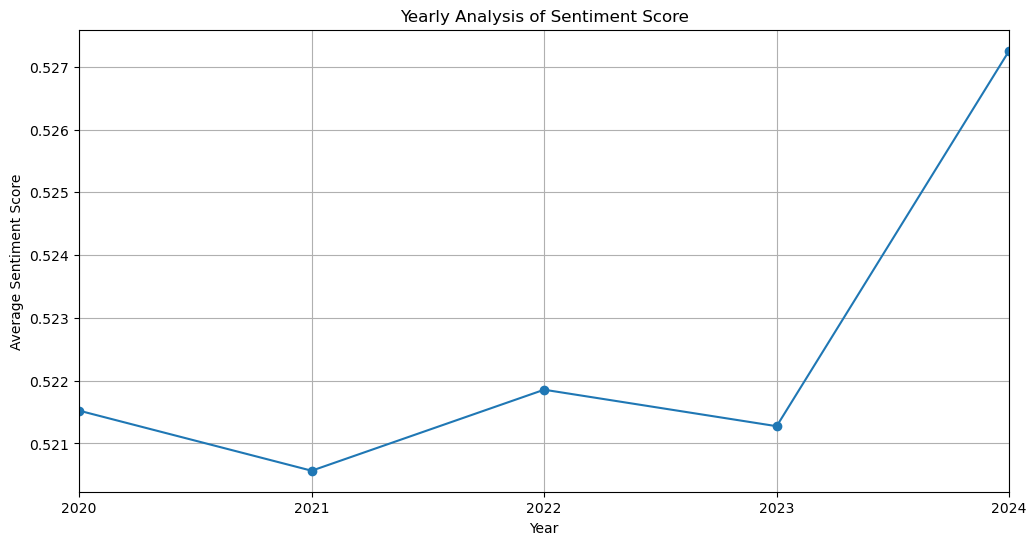

In [14]:
news_df['date'] = pd.to_datetime(news_df['date'])

yearly_sentiment_score = news_df.resample('Y', on='date')['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
yearly_sentiment_score.plot(kind='line', marker='o', linestyle='-')
plt.title('Yearly Analysis of Sentiment Score')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


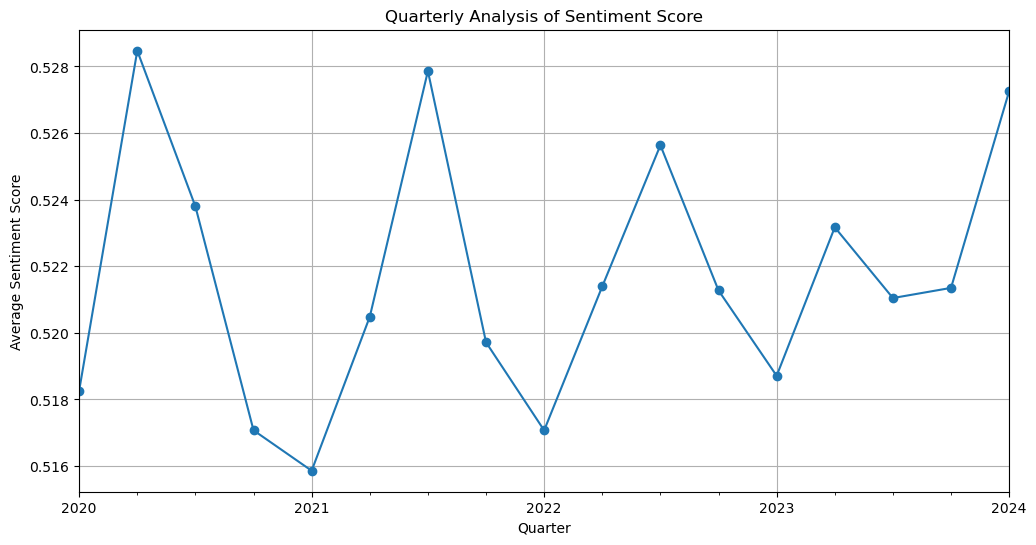

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

news_df['date'] = pd.to_datetime(news_df['date'])

quarterly_sentiment_score = news_df.resample('Q', on='date')['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
quarterly_sentiment_score.plot(kind='line', marker='o', linestyle='-')
plt.title('Quarterly Analysis of Sentiment Score')
plt.xlabel('Quarter')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


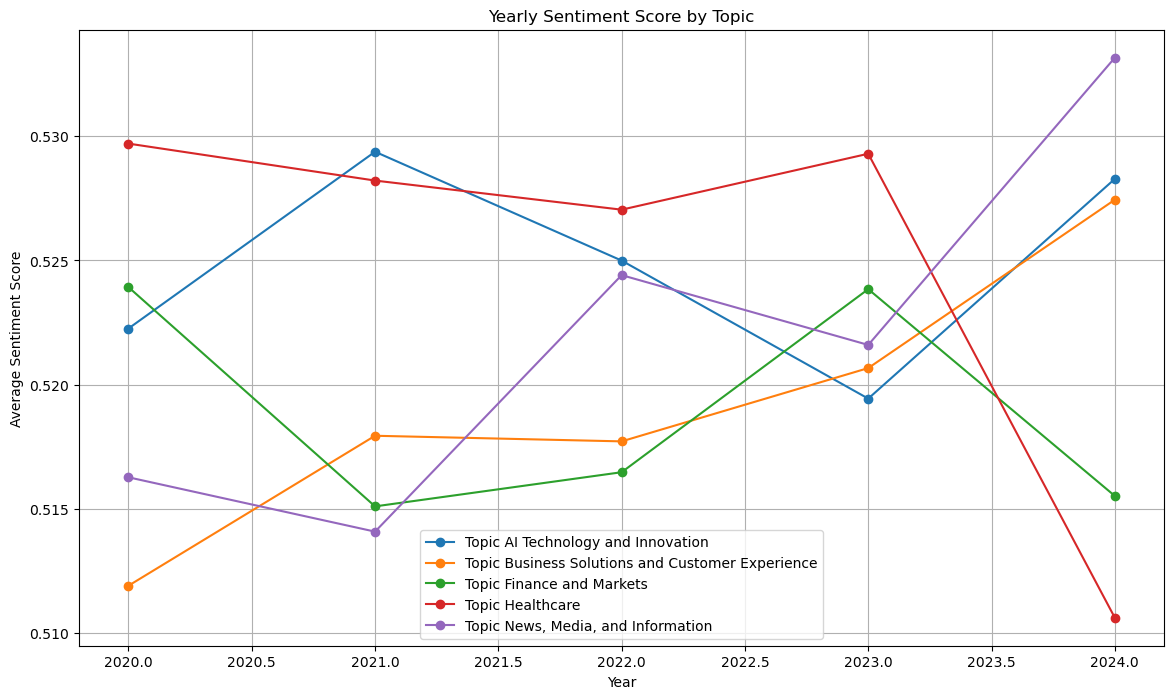

In [15]:
news_df['date'] = pd.to_datetime(news_df['date'])
yearly_topic_sentiment = news_df.groupby([news_df['date'].dt.year, 'industry'])['sentiment_score'].mean().unstack()

plt.figure(figsize=(14, 8))

for topic in yearly_topic_sentiment.columns:
    plt.plot(yearly_topic_sentiment.index, yearly_topic_sentiment[topic], marker='o', label=f'Topic {topic}')

plt.title('Yearly Sentiment Score by Topic')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


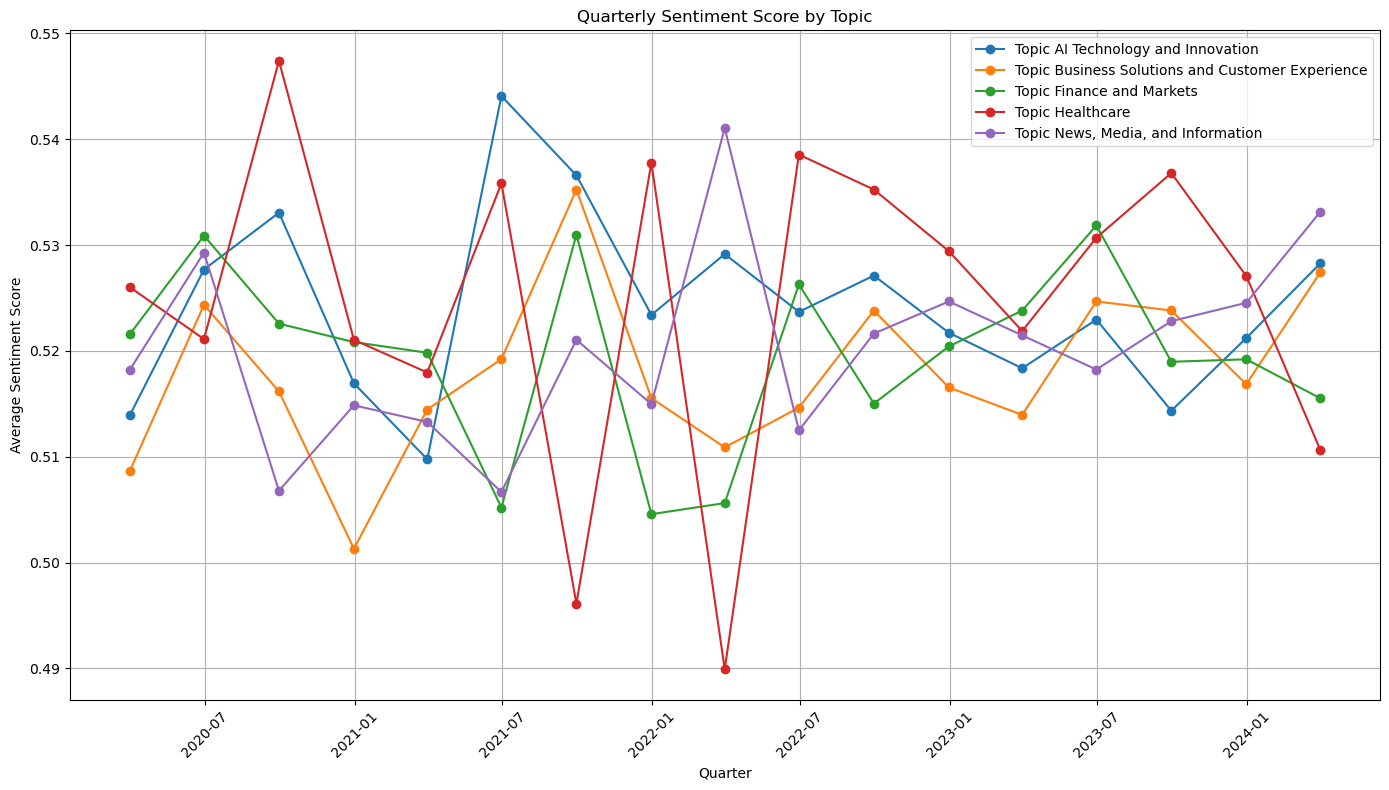

In [22]:
# 'date' 컬럼을 기준으로 데이터를 분기별로 그룹화하고, 각 'industry'의 평균 감정 점수를 계산
quarterly_topic_sentiment = news_df.groupby([pd.Grouper(key='date', freq='Q'), 'industry'])['sentiment_score'].mean().unstack()

plt.figure(figsize=(14, 8))

# 각 'industry'(주제)별로 분기별 평균 감정 점수를 선 그래프로 그림
for topic in quarterly_topic_sentiment.columns:
    plt.plot(quarterly_topic_sentiment.index, quarterly_topic_sentiment[topic], marker='o', label=f'Topic {topic}')

plt.title('Quarterly Sentiment Score by Topic')
plt.xlabel('Quarter')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # x축 라벨이 겹치지 않도록 회전
plt.tight_layout()  # 그래프가 잘리지 않도록 조정
plt.show()


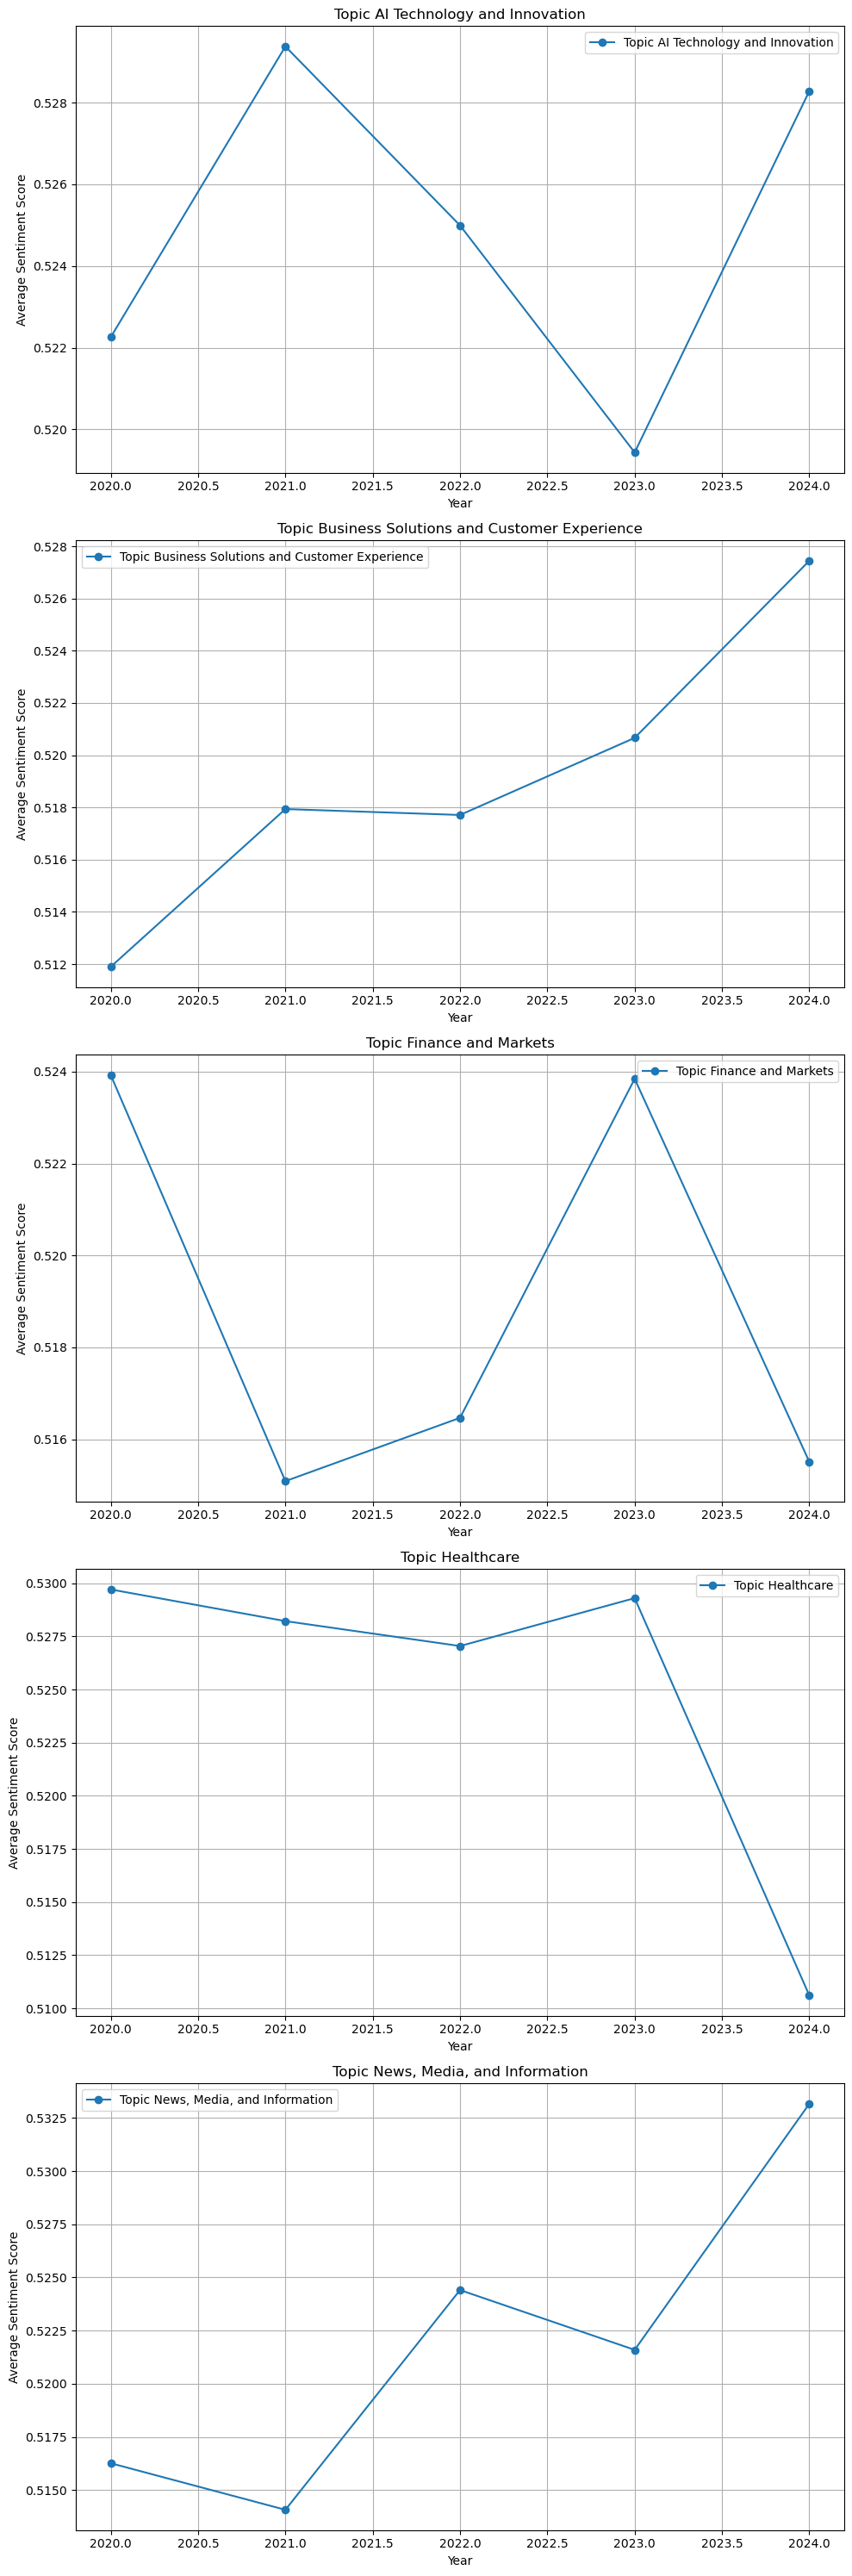

In [19]:
news_df['date'] = pd.to_datetime(news_df['date'])

yearly_topic_sentiment = news_df.groupby([news_df['date'].dt.year, 'industry'])['sentiment_score'].mean().unstack()

num_topics = len(yearly_topic_sentiment.columns)
fig, axes = plt.subplots(num_topics, 1, figsize=(10, 6 * num_topics))

for i, topic in enumerate(yearly_topic_sentiment.columns):
    axes[i].plot(yearly_topic_sentiment.index, yearly_topic_sentiment[topic], marker='o', linestyle='-', label=f'Topic {topic}')
    axes[i].set_title(f'Topic {topic}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Average Sentiment Score')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


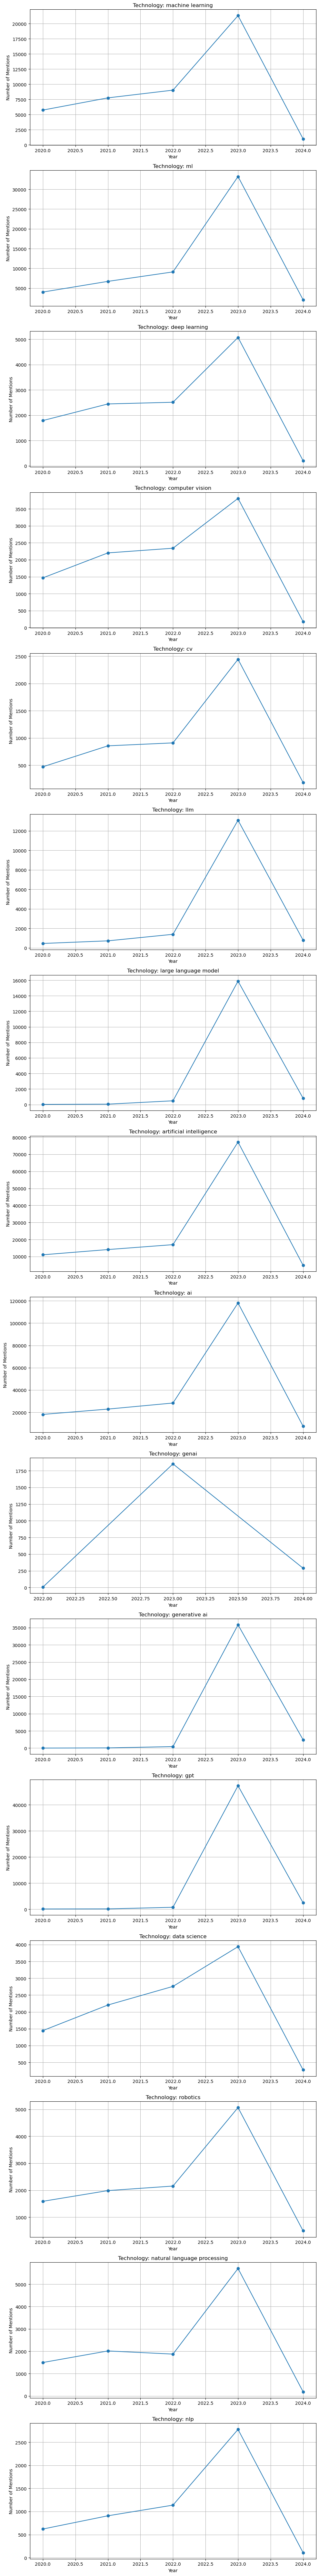

In [17]:

technologies = ['machine learning', 'ml','deep learning','computer vision', 'llm', 'large language model', 'artificial intelligence', 'ai', 'genai','generative ai', 'gpt', 'chatgpt','chat' 'data science', 'robotics', 'natural language processing', 'nlp']

technology_mentions = {
    tech: news_df[news_df['clean_text'].str.contains(tech, case=False)]['date'].dt.year.value_counts().sort_index()
    for tech in technologies
}

# 시각화
fig, axes = plt.subplots(len(technologies), 1, figsize=(10, 5 * len(technologies)))

for i, (tech, mentions) in enumerate(technology_mentions.items()):
    axes[i].plot(mentions.index, mentions.values, marker='o', linestyle='-', color='tab:blue')
    axes[i].set_title(f'Technology: {tech}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Mentions')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Negatvie Sentiments

In [20]:
# Assuming news_df already has 'sentiment_score' and 'sentiment' columns updated with sentiments

# Filter rows where sentiment is 'negative'
negative_sentiments_df = news_df[news_df['sentiment'] == 'negative']

# Display the DataFrame with only negative sentiments
print(negative_sentiments_df)


                                                                                                                                                                                                                             url  \
145982                                                                                                                              https://www.nbc11news.com/prnewswire/2023/10/19/best-ai-girlfriend-you-can-get-nsfw-ai-chat/   
181142                                                                                              https://www.safetylit.org/citations/index.php?fuseaction=citations.viewdetails&citationIds%5B%5D=citjournalarticle_698286_34   
101629  https://venturebeat.com/2020/03/30/ai-is-bad-at-predicting-gpa-grit-eviction-job-training-layoffs-and-material-hardship/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+venturebeat%2FSZYF+%28VentureBeat%29   
133455                                                                                  